<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = {
    "outlook": ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    "temperature": ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    "humidity": ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    "wind": ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    "play": ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)
display(df)

,outlook,temperature,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [2]:
import math
# Entropy calculation
def entropy(target_col):
    values = target_col.value_counts(normalize=True)
    return -sum(p * math.log2(p) for p in values)

# Information Gain calculation
def information_gain(df, feature, target='play'):
    total_entropy = entropy(df[target])
    values = df[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        weight = len(subset) / len(df)
        subset_entropy = entropy(subset[target])
        weighted_entropy += weight * subset_entropy

    return total_entropy - weighted_entropy

# Calculate and print results
entropy_total = entropy(df['play'])
info_gains = {
    feature: information_gain(df, feature, target='play')
    for feature in ['outlook', 'temperature', 'humidity', 'wind']
}

print(f"Total Entropy: {entropy_total:.4f}")
for feature, ig in info_gains.items():
    print(f"Information Gain for {feature}: {ig:.4f}")

Total Entropy: 0.9403
Information Gain for outlook: 0.2467
Information Gain for temperature: 0.0292
Information Gain for humidity: 0.1518
Information Gain for wind: 0.0481


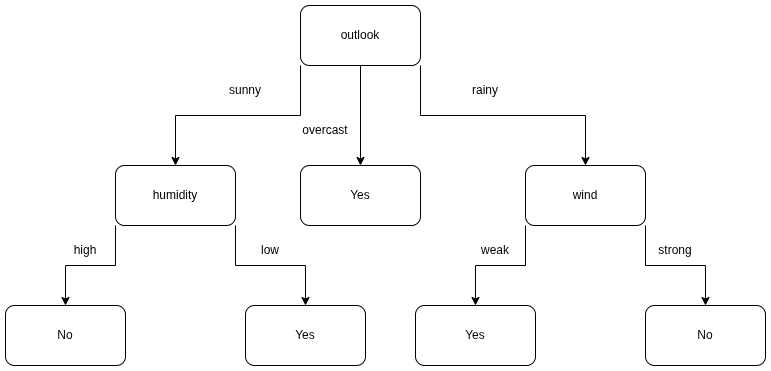